- Non-pretrained 와 pretrained 둘다 각 12epoch로 진행을 하였습니다.
: 성능표로 비교를해보면 크게 Average Precision , Average Recall 비교를 할수 있습니다.

이때

- AP(Average Precision)은 평균 정밀도를 의미를 하고 기본 정밀도의 식은 $\frac{TP}{TP+FP}$ 이다.
> : 전체 검출 결과 중 옳은 검출의 비율을 의미 (높을수로 좋다)

- AR(Average Recall)은 평균 재현율을 의미를 하고 기본 재현율의 식은 $\frac{TP}{TP+FN}$ 이다.
> : 옳게 검출한 것과 검출 못한것의 합의 비율 (높을수로 좋다.)

:: 
똑같은 epoch로 학습한  non-pretrained, pretrained를 AP,AR를 비교를 해보면 pretrained 한쪽의 값들이 차이가 많이 날정도로 높다는 걸 볼수 있다.  AP값이 더 높으니 Boundary box를 한곳에 더 정확하게 class를 분류를 할수 있고, AR값이 더 높으니 Boundary box를 좀 더 정확한 곳에 검출되어야 할 곳에 물체를 감싸고 있을 수 있다. 

마지막 코드쪽에 test image를 하나 들고와서 확인 해봤을때도 pretrain한쪽이 제대로 된 곳에 Boundary box로 감싸고 있고 좀 더 제대로 된 분류를 하였다 는걸 시각적으로 볼 수있다.
- 하지만 epoch를 둘 다 12번만 돌렸기 때문에 만족할만한 결과가 안나온걸 가

pretrained model로 학습을 돌렸을때는 처음부터 학습을 돌린것이 아니기 때문에 같은시간 같은 epoch를 돌려도 좀 더 좋은 성능을 가진다고 볼 수 있다.
> - 시간 절약 
> - 성능이 더 잘나온다.
> - 상대적으로 적은 data set으로 학습이 가능하다.



## 성능표 
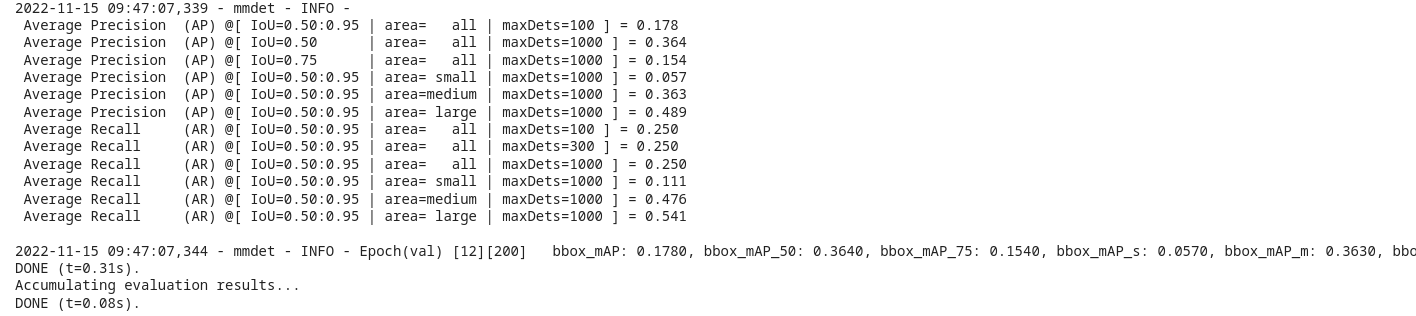

In [ ]:
from google.colab import drive

# mount
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Check nvcc version 
!nvcc -V
# Check GCC version 
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install dependencies: (use cu111 because colab has CUDA 11.1)
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.3 MB/s eta 0:15:35tcmalloc: large alloc 1147494400 bytes == 0x398dc000 @  0x7fcb782ad615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████▌               | 1055.7 MB 1.5 MB/s eta 0:11:03tcmalloc: large alloc 1434370048 bytes == 0x7df32000 @  0x7fcb782ad615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████

In [ ]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'linux',
 'Python': '3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.2, V11.2.152',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.25.3
11.1
GCC 7.3


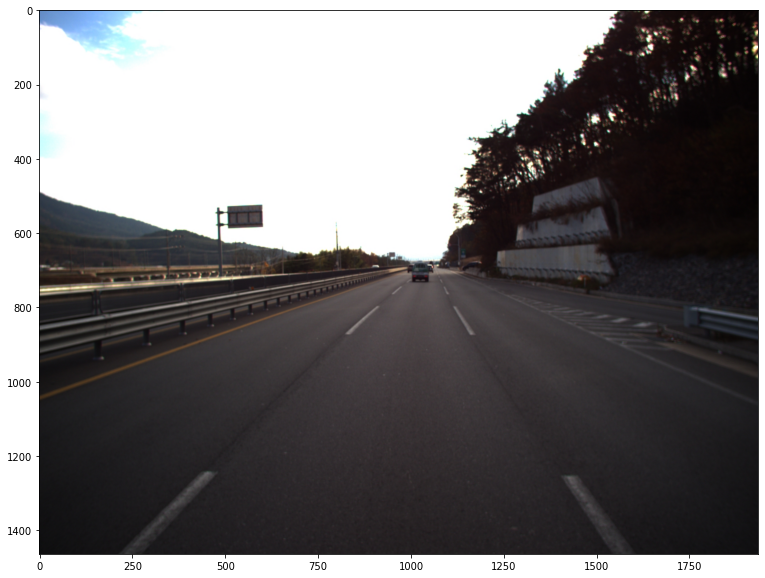

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/gdrive/MyDrive/SWT_hw2/train_road_information/image/i0001205.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
## config 를 faster_rcnn_r50_caffe_fpn_mstrain_1x로 설정 
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py')

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
#  COCO data set type 설정 
cfg.dataset_type = 'CocoDataset'
cfg.data_root = '/content/gdrive/MyDrive/SWT_hw2/'

# config test 의 data_root , images, 전처리한 lable json , classee 변경  
cfg.data.test.data_root = '/content/gdrive/MyDrive/SWT_hw2/test_road_information/'
# cfg.data.test.ann_file = 'coco_test2.json' 
cfg.data.test.ann_file = 'test (2).json' 
cfg.data.test.img_prefix = 'image' 
cfg.data.test.classes = ("traffic_light","traffic_sign")

# config train 의 data_root , images, 전처리한 lable json , classee 변경 
cfg.data.train.data_root = '/content/gdrive/MyDrive/SWT_hw2/train_road_information/'
# cfg.data.train.ann_file = 'coco_train2.json'
cfg.data.train.ann_file = 'train (1).json' 
cfg.data.train.img_prefix = 'image'
cfg.data.train.classes = ("traffic_light","traffic_sign")

# config val 의 data_root , images, 전처리한 lable json , classee 변경 -> validation 을 따로 설정 안해서 test로 설정
cfg.data.val.data_root = '/content/gdrive/MyDrive/SWT_hw2/test_road_information/'
# cfg.data.val.ann_file = 'coco_test2.json' 
cfg.data.val.ann_file = 'test (2).json' 
cfg.data.val.img_prefix = 'image'
cfg.data.val.classes = ("traffic_light","traffic_sign")

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 2 #class가 ("traffic_light","traffic_sign")라 2로 설정 
cfg.load_from = '/content/gdrive/MyDrive/SWT_hw2/model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' # checkpoint 설정, pretrain
cfg.work_dir = './tutorial_exps'


# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.002 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 12

cfg.runner.max_epochs= 12
# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'bbox'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12
# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device = 'cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

ModuleNotFoundError: ignored

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os.path as osp

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


2022-11-20 13:33:59,005 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-11-20 13:33:59,181 - mmdet - INFO - load checkpoint from local path: /content/gdrive/MyDrive/SWT_hw2/model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


2022-11-20 13:34:03,075 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([3, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([3]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([8, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([8]).
2022-11-20 13:34:03,089 - mmdet - INFO - Start running, host: root@e04af4f6ecdd, work_dir: /content/mmdetection/tutorial_exps
2022-11-20 13:34:03,094 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   )

ValueError: ignored

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

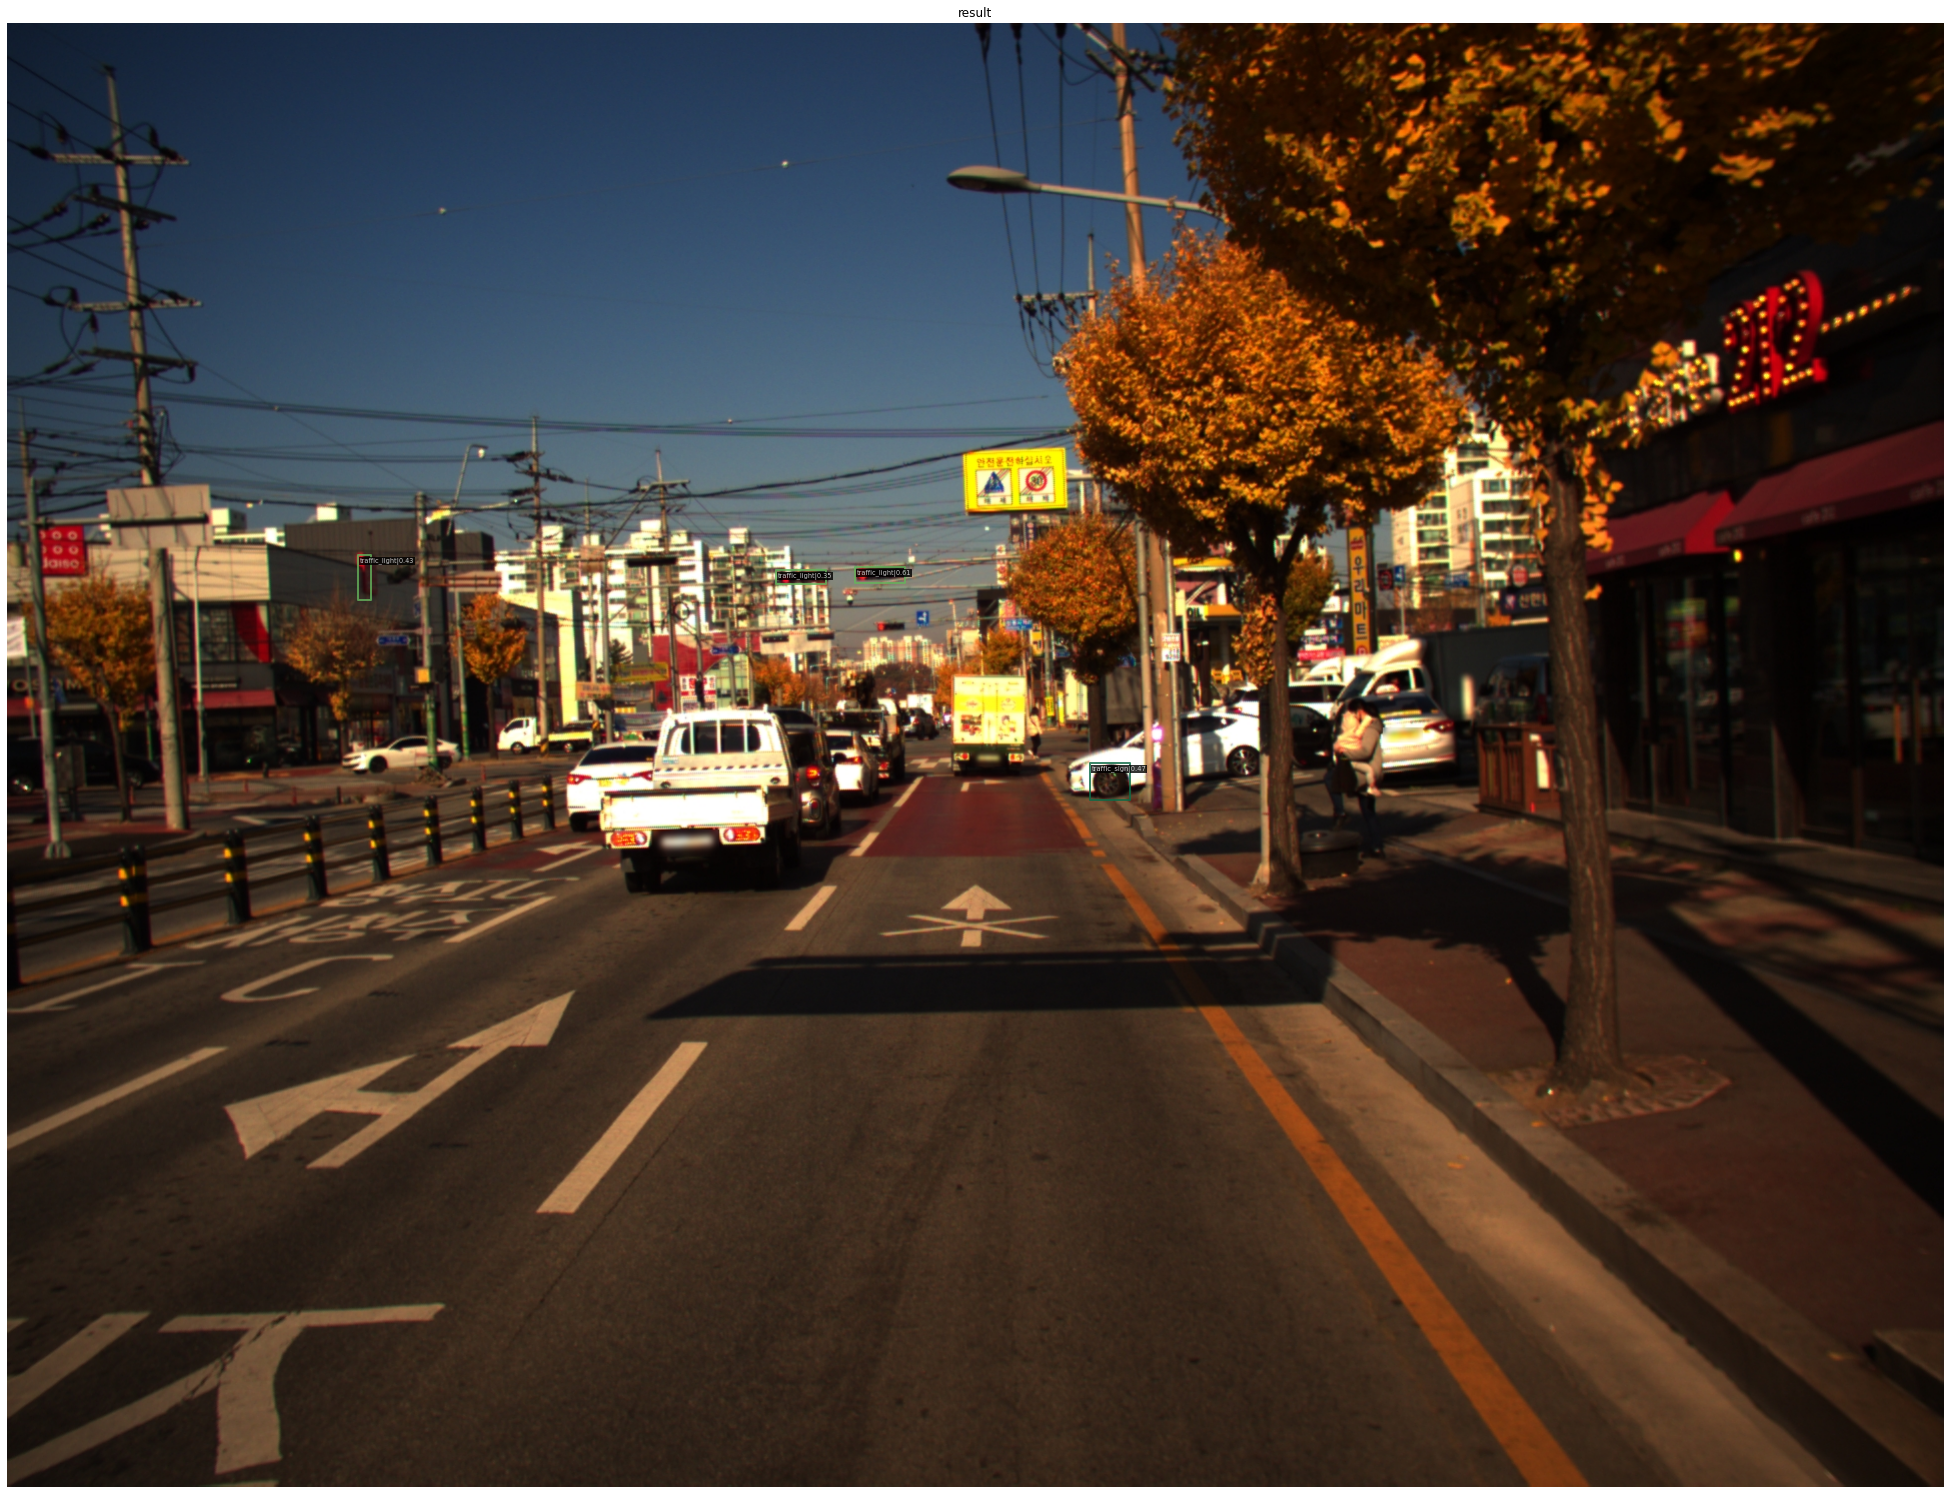

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
img = mmcv.imread('/content/gdrive/MyDrive/SWT_hw2/test_road_information/image/i0659238.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)